# Visual Analyses

In this notebook I heavily use the multiplex visualization library to visualize the sentiment score generated by the VADER
analyzer.

A number of visualizations are generated.

# Setup

In [1]:
import json
import importlib
import matplotlib.pyplot as plt
import os
import sys
from multiplex import drawable
from tqdm.notebook import tqdm
from collections import defaultdict
import pandas as pd

Load the daily mean score tweets into LanguageP.

In [2]:
jsontweets = json.load(open('Data/MeanSentiment.json'))
tweets = {jsontweets[id]['month']: jsontweets[id]['day'] for id in jsontweets}
LanguageP = tweets

Using the os library, get set the ```date_range``` variable to the files in the Data/FilteredTwitterIDs/ directory.

In [3]:
_date_range = os.listdir('Data/FilteredTwitterIDs/')
dates = {'Dec':[], 'Jan':[], 'Feb':[], 'Mar':[], 'Apr':[], 'May':[]}
for date in _date_range:
    if '0' in date:
        new_date = '01/'
    if '1' in date:
        new_date = '07/'
    if '2' in date:
        new_date = '14/'
    if '3' in date:
        new_date = '21/'
    if '4' in date:
        if 'May' in date:
             new_date = '26/'
        else:
             new_date = '28/'

    if 'December' in date:
        new_date += '12'
        dates['Dec'].append(new_date)
    if 'January' in date:
        new_date += '01'
        dates['Jan'].append(new_date)
    if 'February' in date:
        new_date += '02'
        dates['Feb'].append(new_date)
    if 'March' in date:
        new_date += '03'
        dates['Mar'].append(new_date)
    if 'April' in date:
        new_date += '04'
        dates['Apr'].append(new_date)
    if 'May' in date:
        new_date += '05'
        dates['May'].append(new_date)

date_range = []

for month in dates:
    for date in dates[month]:
        date_range.append(date)

Set up the multiplex library styles for the daily sentiment visualizations.

In [4]:
drawable = importlib.reload(drawable)
# reload the style
plt.style.use(os.path.join(sys.path[0], 'styles', "multiplex-dark.style"))

# create a general style
style = { 'linewidth': 2, 'label_style': { 'fontweight': 500 } }

en_style = { 'color': '#f0ead6', 'label': 'English' }
es_style = { 'color': '#ffff00', 'label': 'Spanish' }
fr_style = { 'color': '#1560bd', 'label': 'French' }
de_style = { 'color': '#004b49', 'label': 'German' }
nl_style = { 'color': '#ff9933', 'label': 'Dutch' }
it_style = { 'color': '#00bfff', 'label': 'Italian' }

# Daily Mean Sentiment Plots

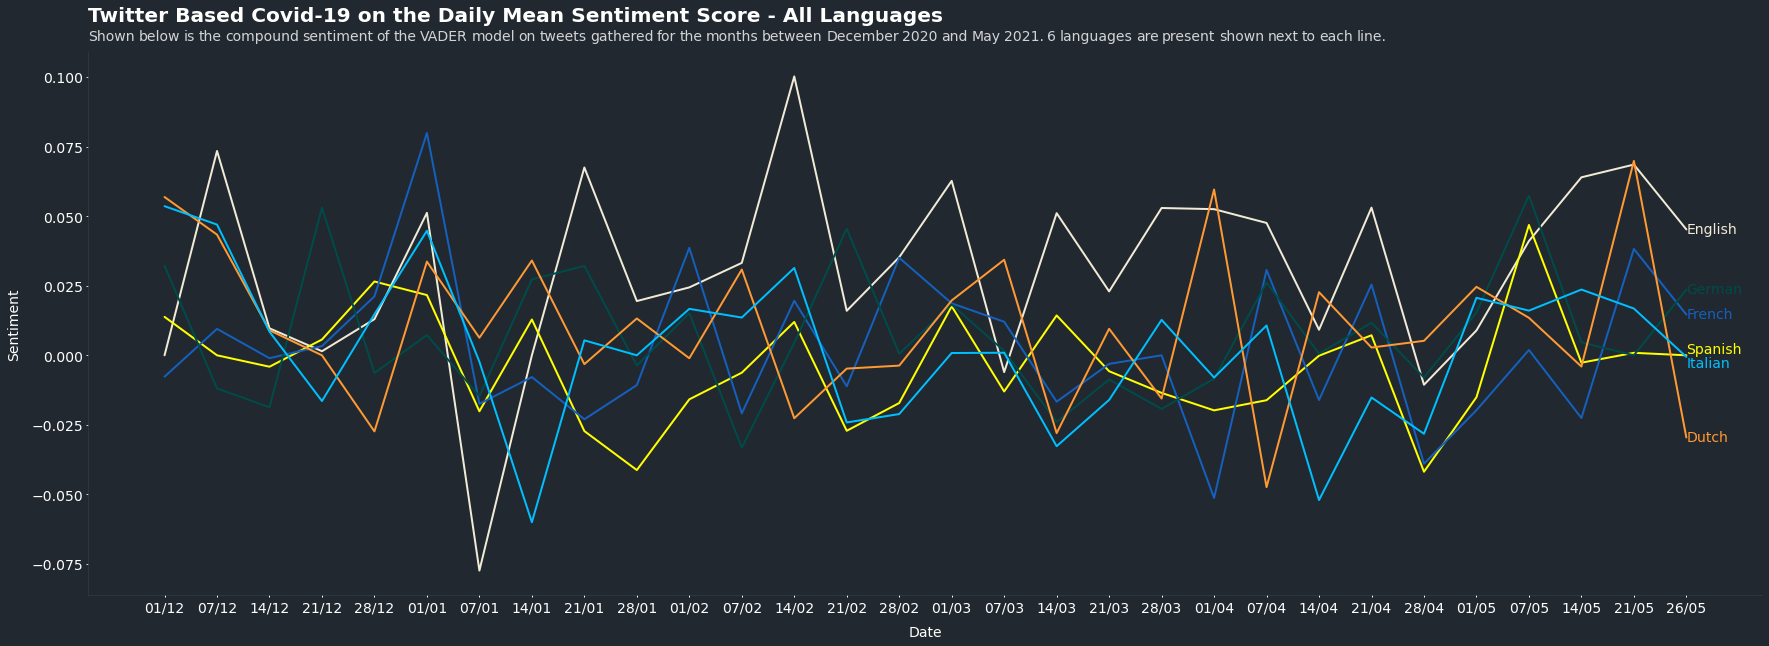

In [5]:
# draw the visualization
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), LanguageP[1], **style, **en_style)
viz.draw_time_series(range(0, 30), LanguageP[2], **style, **es_style)
viz.draw_time_series(range(0, 30), LanguageP[3], **style, **fr_style)
viz.draw_time_series(range(0, 30), LanguageP[4], **style, **de_style)
viz.draw_time_series(range(0, 30), LanguageP[5], **style, **nl_style)
viz.draw_time_series(range(0, 30), LanguageP[6], **style, **it_style)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Daily Mean Sentiment Score - All Languages', loc='left')
viz.set_caption("""Shown below is the compound sentiment of the VADER model on tweets
                gathered for the months between December 2020 and May 2021.
                6 languages are present shown next to each line.
                """, align='justify')
viz.savefig(fname='Output/DailyMeanAll',dpi=300, bbox_inches='tight')
viz.show()

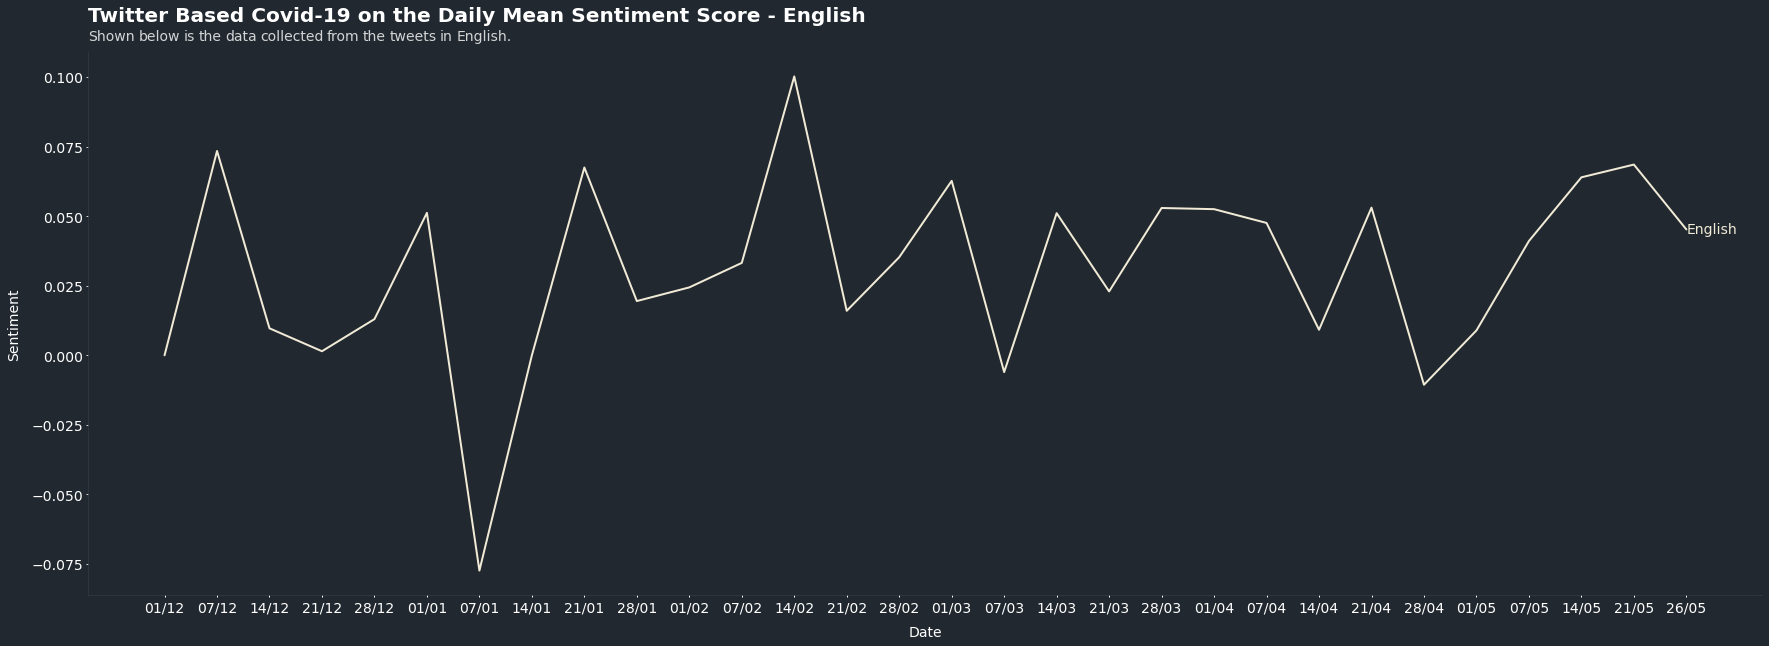

In [6]:
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), LanguageP[1], **style, **en_style)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Daily Mean Sentiment Score - English', loc='left')
viz.set_caption("""Shown below is the data collected from the tweets in English.""", align='justify')
viz.savefig(fname='Output/DailyMeanEnglish',dpi=300, bbox_inches='tight')

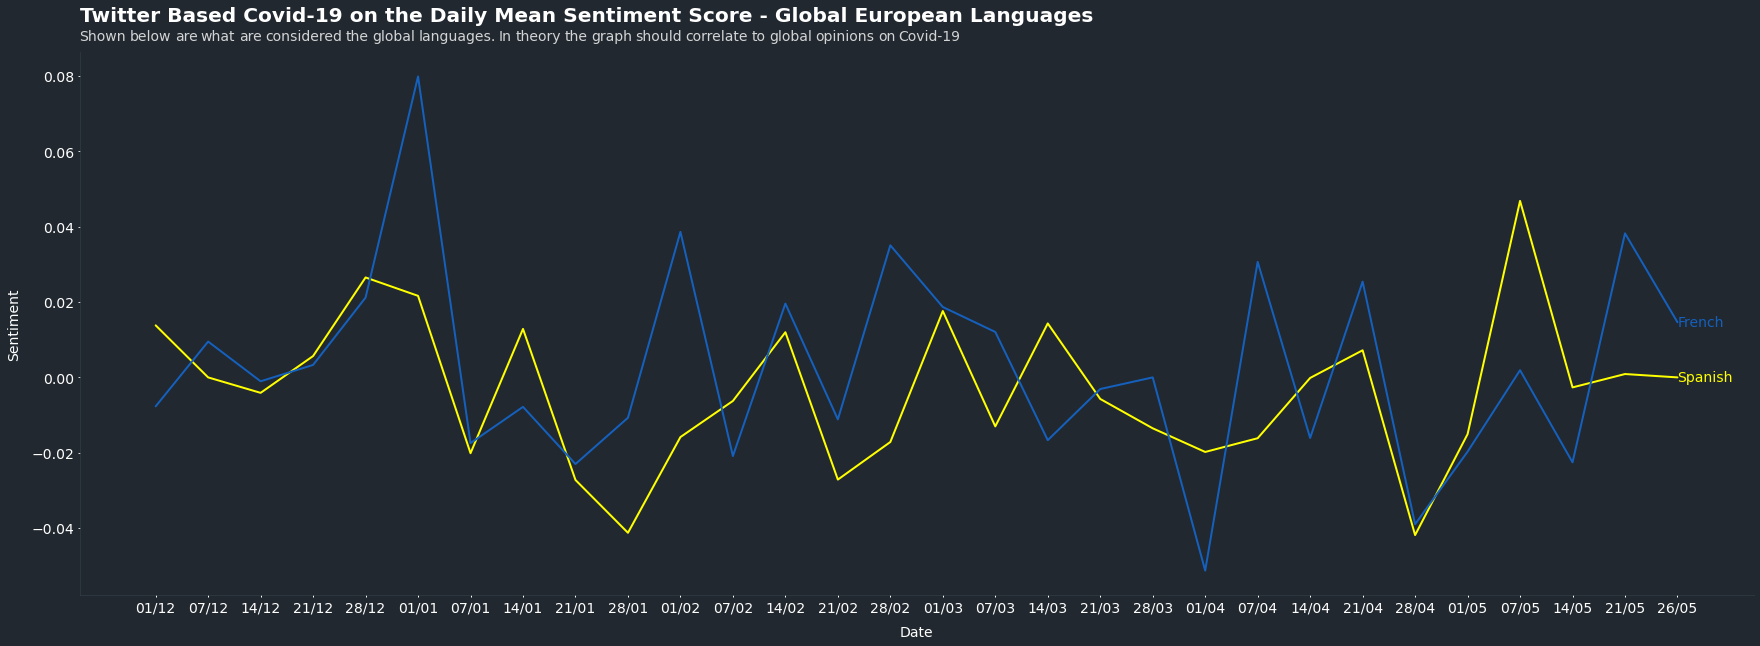

In [7]:
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), LanguageP[2], **style, **es_style)
viz.draw_time_series(range(0, 30), LanguageP[3], **style, **fr_style)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Daily Mean Sentiment Score - Global European Languages', loc='left')
viz.set_caption("""Shown below are what are considered the global languages.
                    In theory the graph should correlate to global opinions on Covid-19""", align='justify')
viz.savefig(fname='Output/DailyMeanGlobal',dpi=300, bbox_inches='tight')
viz.show()

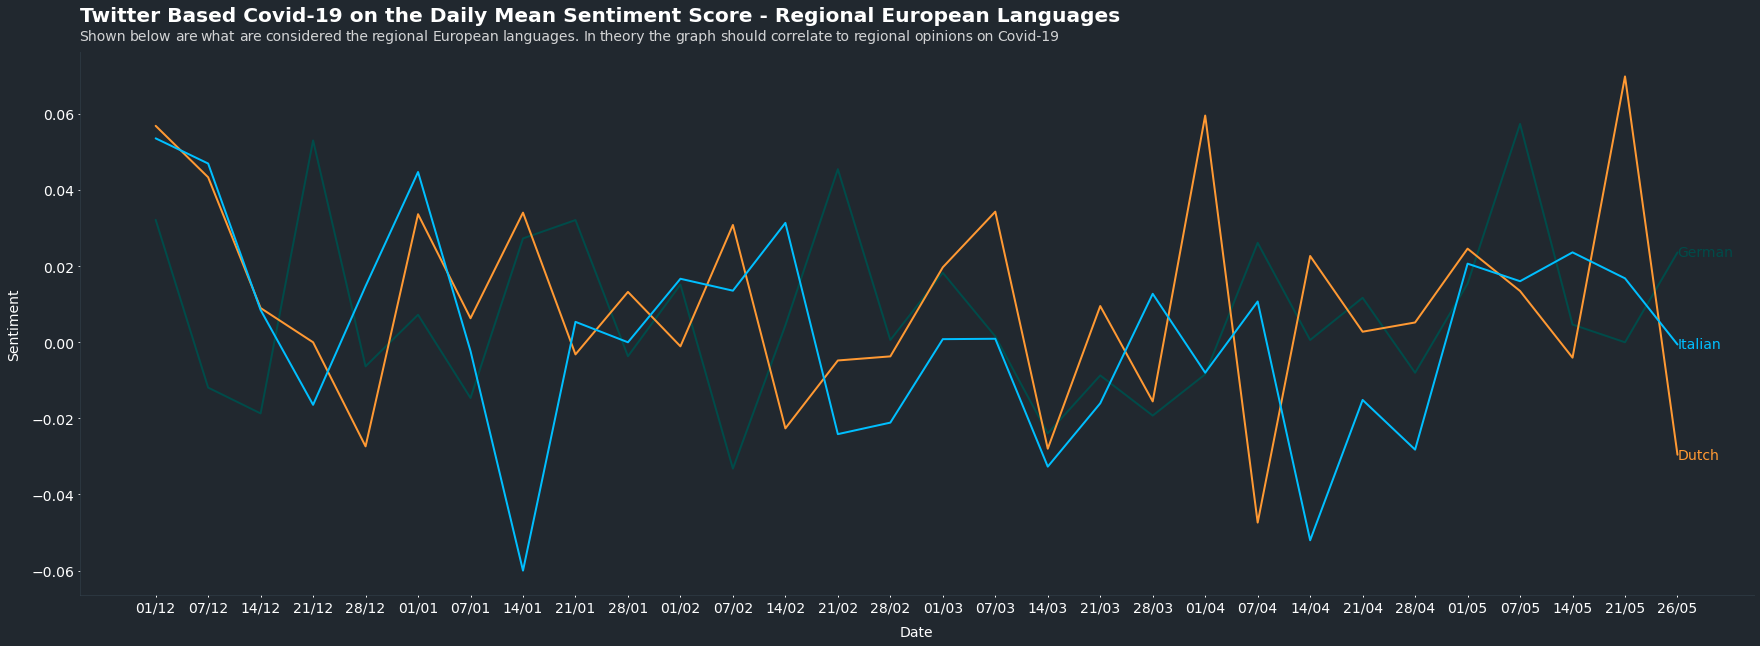

In [8]:
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), LanguageP[4], **style, **de_style)
viz.draw_time_series(range(0, 30), LanguageP[5], **style, **nl_style)
viz.draw_time_series(range(0, 30), LanguageP[6], **style, **it_style)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Daily Mean Sentiment Score - Regional European Languages', loc='left')
viz.set_caption("""Shown below are what are considered the regional European languages.
                    In theory the graph should correlate to regional opinions on Covid-19""", align='justify')
viz.savefig(fname='Output/DailyMeanEurope',dpi=300, bbox_inches='tight')
viz.show()

# Daily Sentiment Classification Plots

While easy to get, the daily mean sentiment does not provide enough information to identify trends. Instead the raw
compound scores will be loaded and classified into one of the following:

* very_positive
* positive
* neutral
* negative
* very_negative

A peak in the lines plotted for each classification should signify a public reaction to an event and it gravity.

In [9]:
LanguageDataFrames = defaultdict(lambda: [])

languages = {
                1: 'en',
                2: 'es',
                3: 'fr',
                4: 'de',
                5: 'nl',
                6: 'it',
            }

for month in tqdm(['December', 'January', 'February', 'March', 'April', 'May']):
    for day in [0, 1, 2, 3, 4]:
        for language in languages:
            path = 'Data/Analyzed/' + str(month) + str(day) + languages[language] + '.json'
            LanguageDataFrames[language].append(pd.read_json(path))

  0%|          | 0/6 [00:00<?, ?it/s]

Classify the scores.

In [10]:
distribution =  {
                    1: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    2: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    3: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    4: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    5: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    6: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]}
                }

for l in [1,2,3,4,5,6]:
    for df in tqdm(LanguageDataFrames[l]):
        # df = df.T
        day = {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]}
        for item in df['Score']:
            if item >= 0.75:
                day['very_positive'].append(item)
            elif 0.25 <= item < 0.75:
                day['positive'].append(item)
            elif -0.25 <= item < 0.25:
                day['neutral'].append(item)
            elif -0.75 <= item < 0.25:
                day['negative'].append(item)
            elif item < -0.75:
                day['very_negative'].append(item)

        for c in distribution[l]:
            distribution[l][c].append(day[c])

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Get the count of the classifications

In [11]:
counts =    {
                1: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                2: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                3: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                4: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                5: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                6: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]}
            }

for l in [1,2,3,4,5,6]:
    for d in distribution[l]:
        for item in distribution[l][d]:
            counts[l][d].append(len(item))

Here a function is written to facilitate the plots. New line styles are added.

In [12]:
vp_style = { 'color': '#00ff00', 'label': 'Very Positive' }
p_style = { 'color': '#4f7942', 'label': 'Positive' }
nn_style = { 'color': '#00bfff', 'label': 'Neutral' }
n_style = { 'color': '#801818', 'label': 'Negative' }
vn_style = { 'color': '#ff003f', 'label': 'Very Negative' }

def plotDistributionLines(count, title, caption, figname):
    figure = plt.figure(figsize=(30, 10))
    viz = drawable.Drawable(figure)
    viz.draw_time_series(range(0, 30), count['very_positive'], **style, **vp_style)
    viz.draw_time_series(range(0, 30), count['positive'], **style, **p_style)
    viz.draw_time_series(range(0, 30), count['neutral'], **style, **nn_style)
    viz.draw_time_series(range(0, 30), count['negative'], **style, **n_style)
    viz.draw_time_series(range(0, 30), count['very_negative'], **style, **vn_style)

    plt.xticks(range(0, 30), date_range)
    # viz.set_xticks(range(0, 30))#, date_range
    viz.set_xlabel('Date')
    viz.set_ylabel('Count')
    viz.set_title(title, loc='left')
    viz.set_caption(caption, align='justify')
    viz.savefig(fname='Output/ScoreClassification'+figname, dpi=300, bbox_inches='tight')

# English Score Classification Count Line Plot

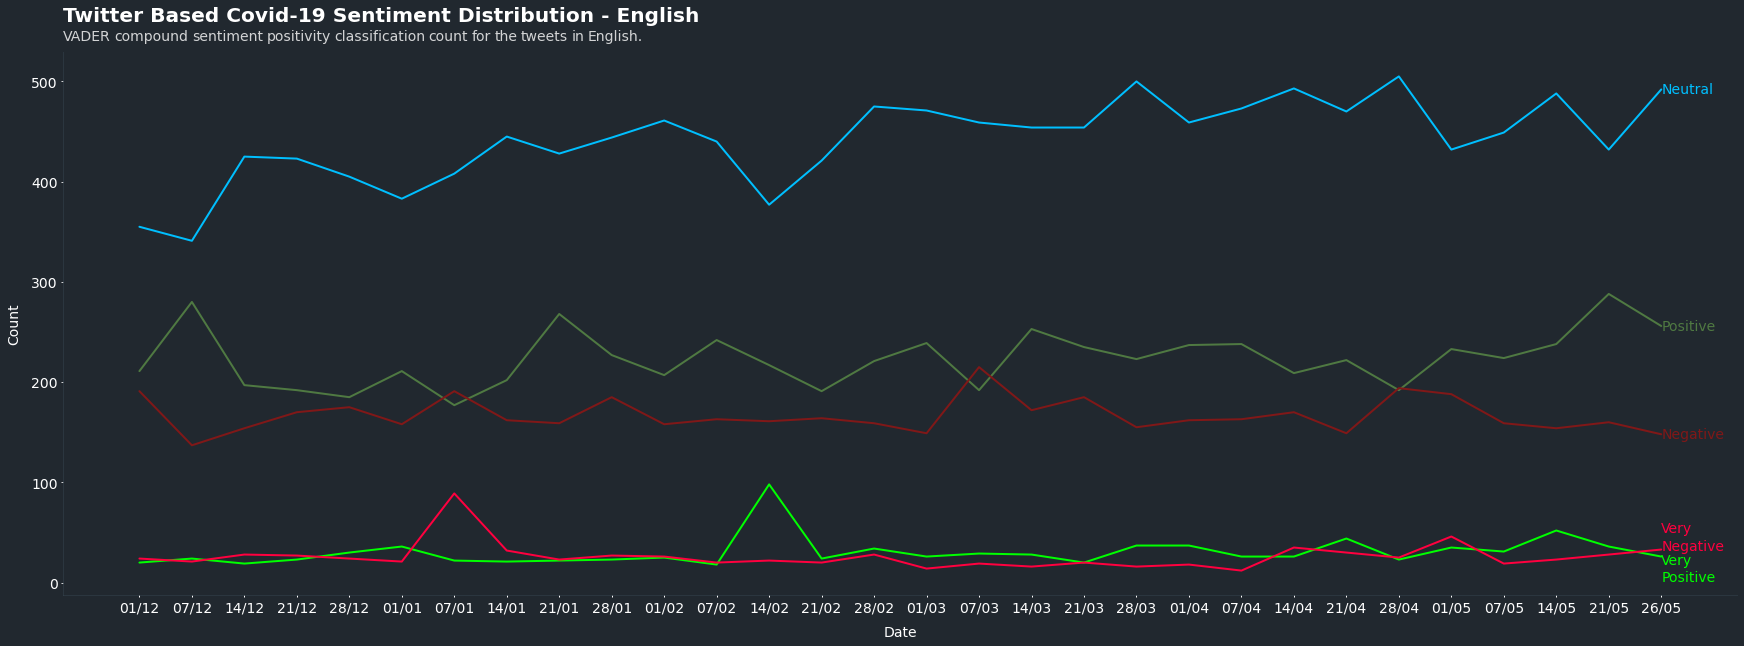

In [13]:
title = 'Twitter Based Covid-19 Sentiment Distribution - English'
caption = "VADER compound sentiment positivity classification count for the tweets in English."
figname = 'EnglishDistribution'

plotDistributionLines(counts[1], title, caption, figname)

# Spanish Score Classification Count Line Plot

In [14]:
title = 'Twitter Based Covid-19 Sentiment Distribution - Spanish'
caption = "VADER compound sentiment positivity classification count for the tweets in Spanish."
figname = 'SpanishDistribution'

# French Score Classification Count Line Plot

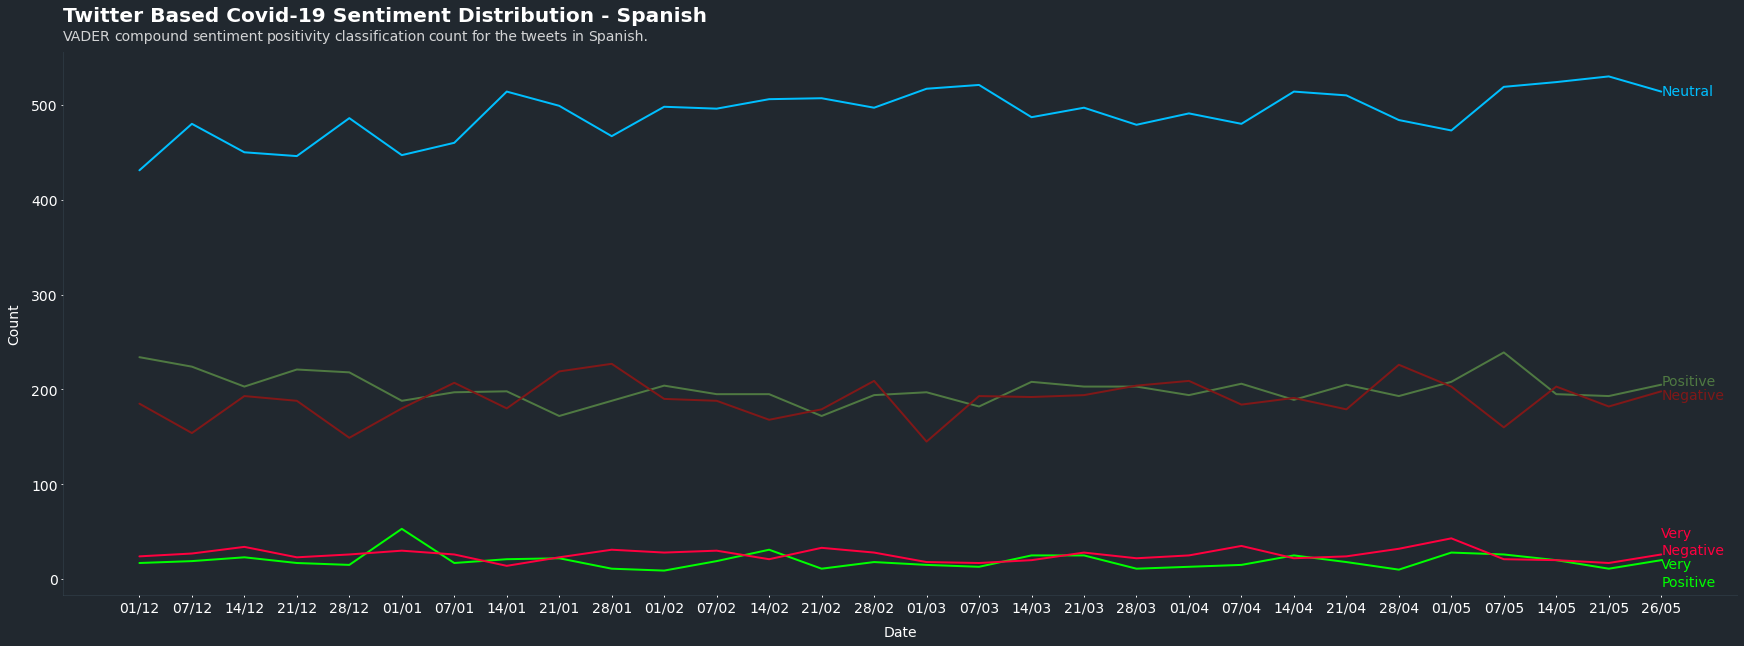

In [15]:
plotDistributionLines(counts[2], title, caption, figname)

title = 'Twitter Based Covid-19 Sentiment Distribution - French'
caption = "VADER compound sentiment positivity classification count for the tweets in French."
figname = 'FrenchDistribution'

# German Score Classification Count Line Plot

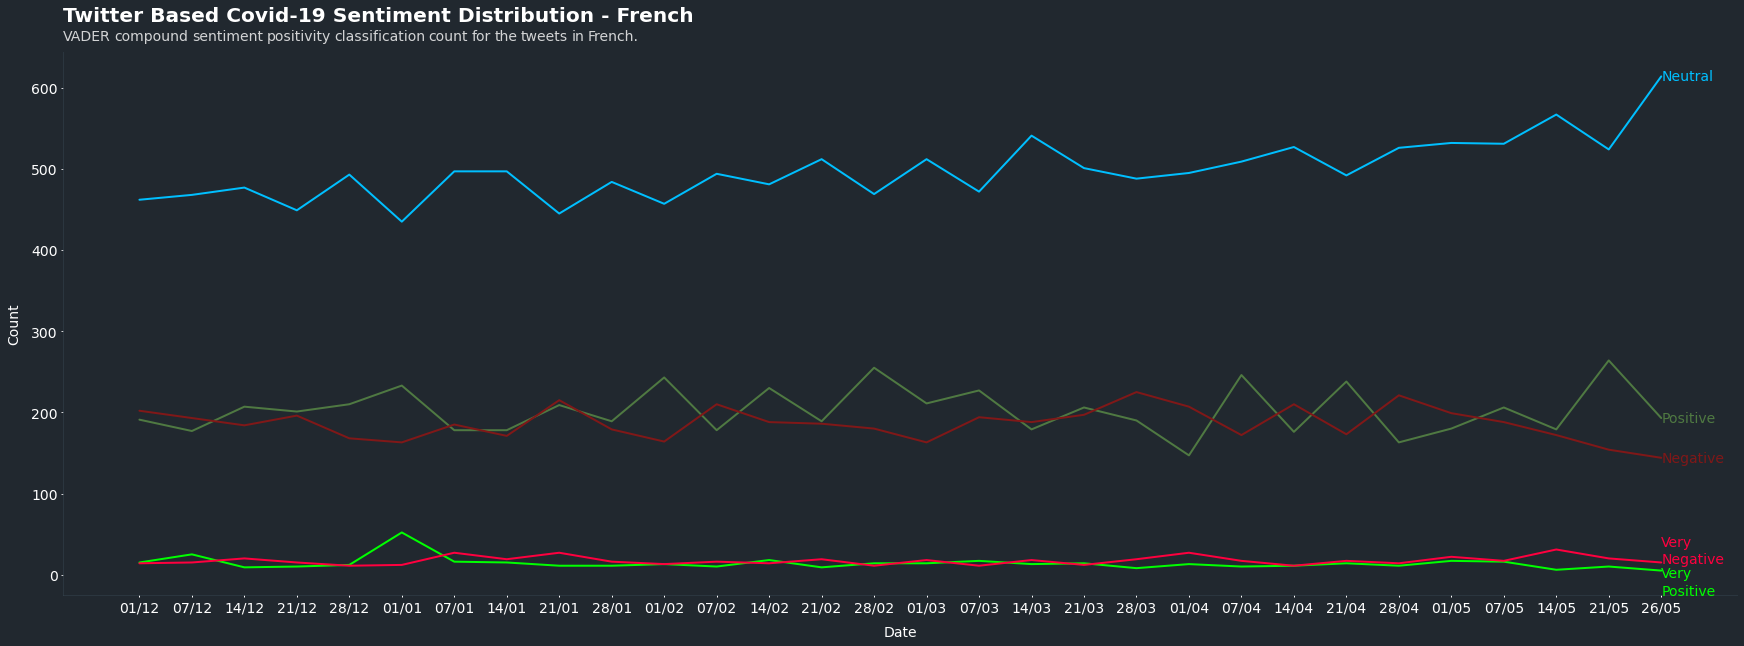

In [16]:
plotDistributionLines(counts[3], title, caption, figname)

title = 'Twitter Based Covid-19 Sentiment Distribution - German'
caption = "VADER compound sentiment positivity classification count for the tweets in German."
figname = 'GermanDistribution'

# Dutch Score Classification Count Line Plot

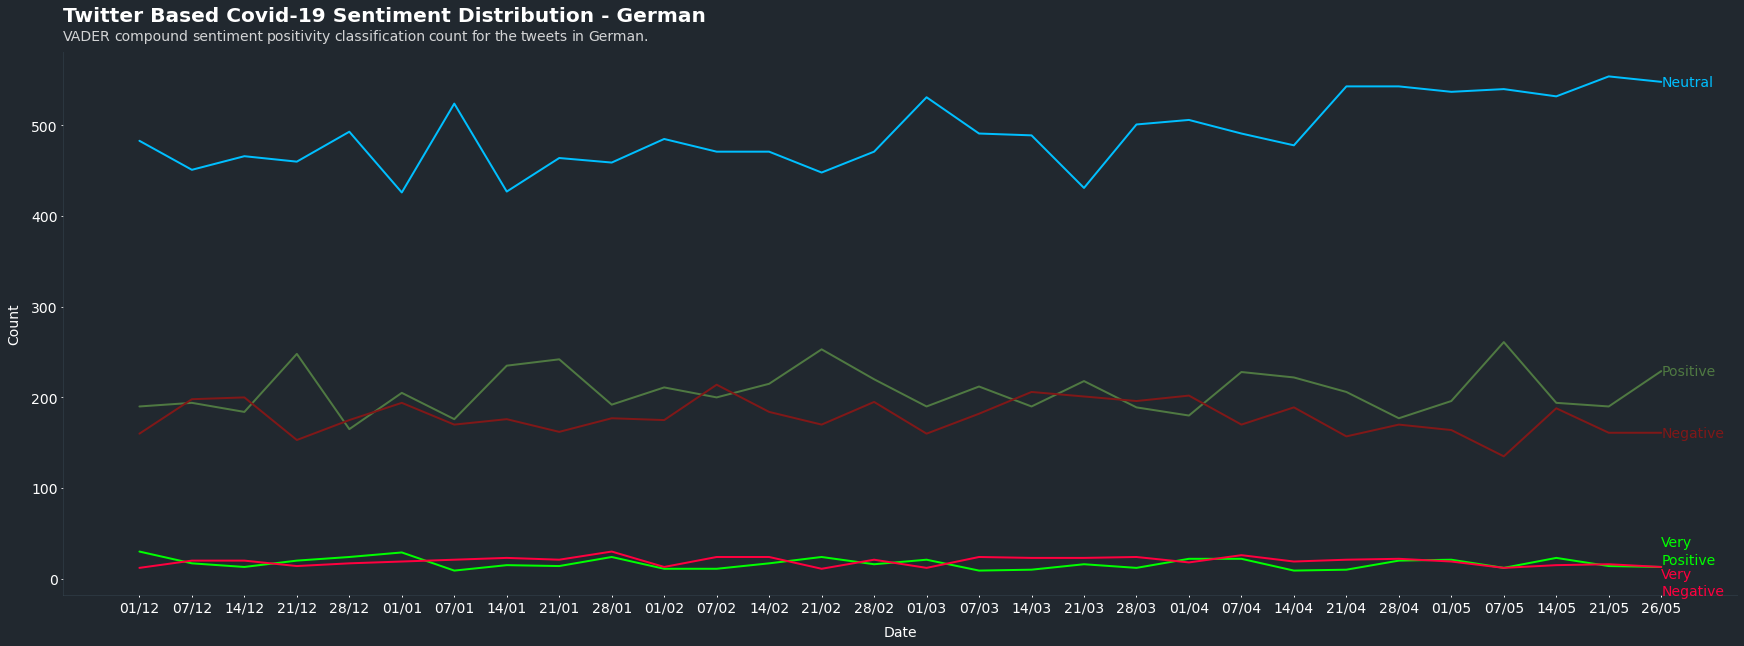

In [17]:
plotDistributionLines(counts[4], title, caption, figname)

title = 'Twitter Based Covid-19 Sentiment Distribution - Dutch'
caption = "VADER compound sentiment positivity classification count for the tweets in Dutch."
figname = 'DutchDistribution'

# Italian Score Classification Count Line Plot

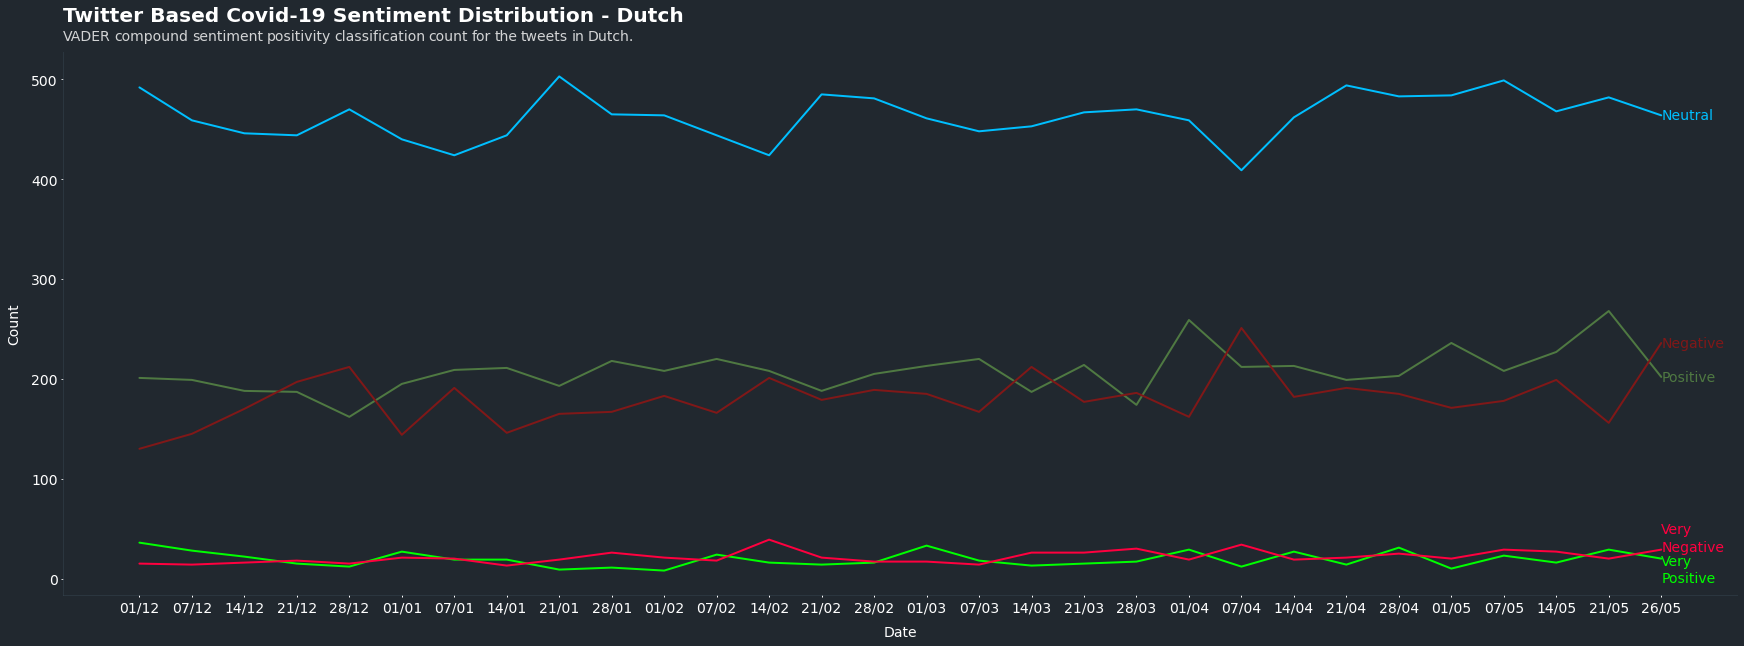

In [18]:
plotDistributionLines(counts[5], title, caption, figname)

title = 'Twitter Based Covid-19 Sentiment Distribution - Italian'
caption = "VADER compound sentiment positivity classification count for the tweets in Italian."
figname = 'ItalianDistribution'

# Matching the plots with a Covid related event